# Black Friday Dataset- EDA

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) 
against various products of different categories. They have shared purchase summary of various customers for selected 
high volume products from last month. The data set also contains customer demographics
(age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category)
and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of
customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
# importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#visualizing all the columns
pd.pandas.set_option('Display.max_columns',None)

In [2]:
#importing the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head(4)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [4]:
# to generalize all the eda actions on both the dataset, we need to combine them together.
df = train_df.append(test_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_8360\2622949975.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df)


In [5]:
df.tail(4)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
# some features are of no use, better to drop them.
df.drop('User_ID', axis = 1, inplace = True)

In [8]:
df.head(4)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0


# Data Preprocessing
categorical features

In [9]:
# Here, we are targetting the Gender categorical feature:
# what type of encoding should we use?
# OneHotEncoding, getdummies(), labelEncoding, simple map('M':1, 'F':0) ?


In [10]:
# label encoding is used when we have {'high','low','medium'} type of priority features
# OneHotEncoding will create N columns with (0,0,0,0... 1).
# getDummies is simple way to do OneHotEncoding.
# simple map will work fine as we have only 2 features(M, F), so we can map to -> 1 / 0.


In [11]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [12]:
# or we can use:
#df['Gender'] = pd.get_dummies(df['Gender'], drop_first = 1)


In [13]:
# here we dropped one column, so its same as mapping, but this will not work when we have more than 2 categories.

In [14]:
# Handle the Age: categorical feature
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
# we can simply do dummies coding:
# but if we think logically, then first (0-17 and 55+) category people will do very less shopping
#i.e. here the shopping will be more for intermediate aged people and less for extreme aged
# so the dummies method or the OneHotEncoding will not work.
# rather we will assign some priority order for those age groups
#### pd.get_dummies(df['Age'], drop_first = True) 

In [16]:
# using map function to give them different values.
df['Age'] = df['Age'].map({'0-17': 1, '55+': 7, '26-35':3 , '46-50': 5, '51-55':6, '36-45':4, '18-25':2})
# should avoid putting 0, since some mathematical equation may be happending behind.

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
# or we can do labelEncoding, it will also do the same thing.
#second technique

In [19]:
#fixing categorical city together.
# and dropping one of the dummy variable(redundant)
df_city=pd.get_dummies(df['City_Category'],drop_first = True)

In [20]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [21]:
df = pd.concat([df,df_city],axis =1)

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
# dropping the city category.
#inplace = true ===> operation is permanent
df.drop('City_Category',axis =1, inplace = True)

In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


# Missing Values

In [25]:
# checking the missing values.
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [26]:
# fixing missing values for the caterogory 1 and 2.
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
#clearly they are discrete features, so we can replace th nan value
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [28]:
# for replacing the discrete features, it's good to use "Mode"
cat2_mode = df['Product_Category_2'].mode()[0]
cat2_mode

8.0

In [29]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [30]:
df['Product_Category_2'].isnull().sum()

0

In [31]:
# now we removed the null values in the second category, 
# same to be done for the third category.


In [32]:
df['Product_Category_3'].mode()[0]
# mode = 16.

16.0

In [33]:
#replacing the nan value with mode = 16.
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [34]:
df['Product_Category_3'].isnull().sum()
# now none of them are null, we successfully removed the null with the mode of the data.

0

In [35]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [36]:
# this is also a categorical feature, with object type.
# and 4+ can be replaced with 4 itself or any other number greater than it.

In [37]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\HP\AppData\Local\Temp\ipykernel_8360\66897005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [38]:
df.head(5)
#clearly the 4+ is replaced with 4.

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [39]:
# but this stay in current city year is an object type, need to be converted into integer.
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [41]:
# B and C are in uint type.
#let's convert them to integer
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

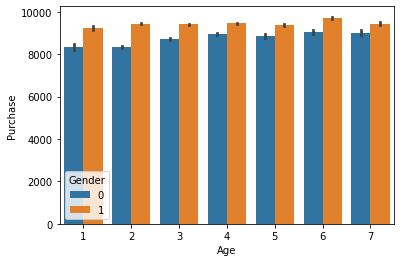

In [43]:
#visualization of Age Vs Purchase for male/female
sns.barplot('Age','Purchase', hue='Gender',data = df)

# Purchase of Men is more than Women

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

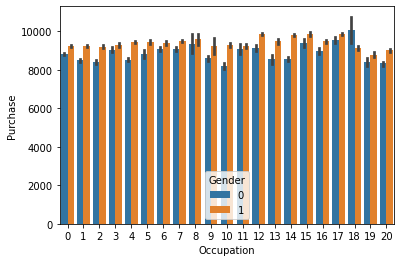

In [44]:
# visualization of Purchase with Occupation
sns.barplot('Occupation','Purchase',hue='Gender',data = df)

In [45]:
# this is uniform

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

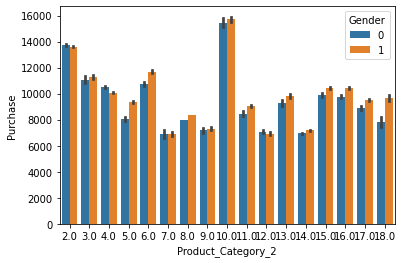

In [46]:
# visualizing the product categories with purchase.
sns.barplot('Product_Category_2', 'Purchase',hue='Gender',data = df)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

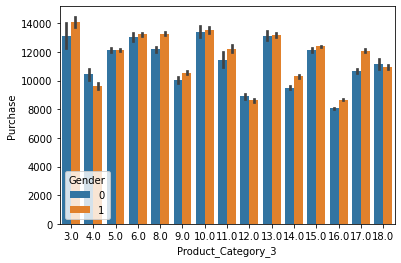

In [47]:
sns.barplot('Product_Category_3', 'Purchase',hue='Gender',data = df)
# little higher purchase of men than women

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

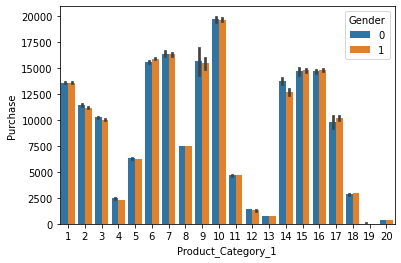

In [48]:
sns.barplot('Product_Category_1', 'Purchase',hue='Gender',data = df)
# equal purchasing for men and women

In [49]:
# out of the above plots the product category 1 is sold maximum.

In [50]:
# separating the test and train dataset now. since we applied the 
# basic preprocessing techniques to make the two dataset similar in nature.
df_test = df[df['Purchase'].isnull()]
df_train= df[~df['Purchase'].isnull()]
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


# Feature Scaling

In [51]:
df_test = df[df['Purchase'].isnull()] # test data has purhcase column as null
df_train=df[~df['Purchase'].isnull()] # all except that will be in train data

In [52]:
x = df_train.loc[:, df.columns != 'Purchase']
# or we can use:
# x = df.drop('Purchase', axis = 1)
x.drop('Product_ID', axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8360\3084671089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('Product_ID', axis = 1, inplace = True)


In [53]:
y = df_train['Purchase']

In [54]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [55]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state = 0)
x_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
41001,1,2,0,3,0,1,6.0,16.0,0,1
16151,1,6,1,0,0,12,8.0,16.0,0,0
507262,1,3,11,2,0,6,8.0,15.0,0,1
368698,1,3,7,4,1,1,2.0,9.0,0,1
353782,1,3,2,1,1,5,14.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...
358551,1,3,11,2,0,1,15.0,16.0,1,0
2689,1,2,4,1,1,1,5.0,8.0,0,0
351244,1,3,17,2,1,5,8.0,14.0,0,1
513194,1,3,0,0,1,5,8.0,16.0,1,0


In [56]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
# used transform only: because we need to fit the model on train data only.

In [ ]:
#  see correlation or feature selection to remove the unimportant features,
#finally fit the model and check the accuracy with the different algorithm.